In [ ]:
import toml
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import ast

In [37]:
analysis = {
    "MLP": {"Au": {}, "Pt": {}, "Pd": {}, "Rh": {}},
    "BNN": {"Au": {}, "Pt": {}, "Pd": {}, "Rh": {}}
}
path = {"MLP": {}, "BNN": {}}
path["BNN"]["Au"] = "/home/nick/Projects/crowpeas/BNN_Au"
path["BNN"]["Pt"] = "/home/nick/Projects/crowpeas/BNN_Pt"
path["BNN"]["Pd"] = "/home/nick/Projects/crowpeas/BNN_Pd"
path["BNN"]["Rh"] = "/home/nick/Projects/crowpeas/BNN_Rh"
path["MLP"]["Au"] = "/home/nick/Projects/crowpeas/MLP_Au"
path["MLP"]["Pt"] = "/home/nick/Projects/crowpeas/MLP_Pt"
path["MLP"]["Pd"] = "/home/nick/Projects/crowpeas/MLP_Pd"
path["MLP"]["Rh"] = "/home/nick/Projects/crowpeas/MLP_Rh"

nns = ["MLP", "BNN"]
elements = ["Au", "Pt", "Pd", "Rh"]


for nn in nns:
    for element in elements:
        # read in the toml file
        test_path = os.path.join(path[nn][element], "predictions.toml")
        with open(test_path, "r") as f:
            data = toml.load(f)
        for key in data.keys():
            analysis[nn][element][data[key]["dataset_name"]] = data[key]


In [54]:
def convert_str_to_list(string: str):
    sl = ast.literal_eval(string)
    return np.array(sl, dtype=float)

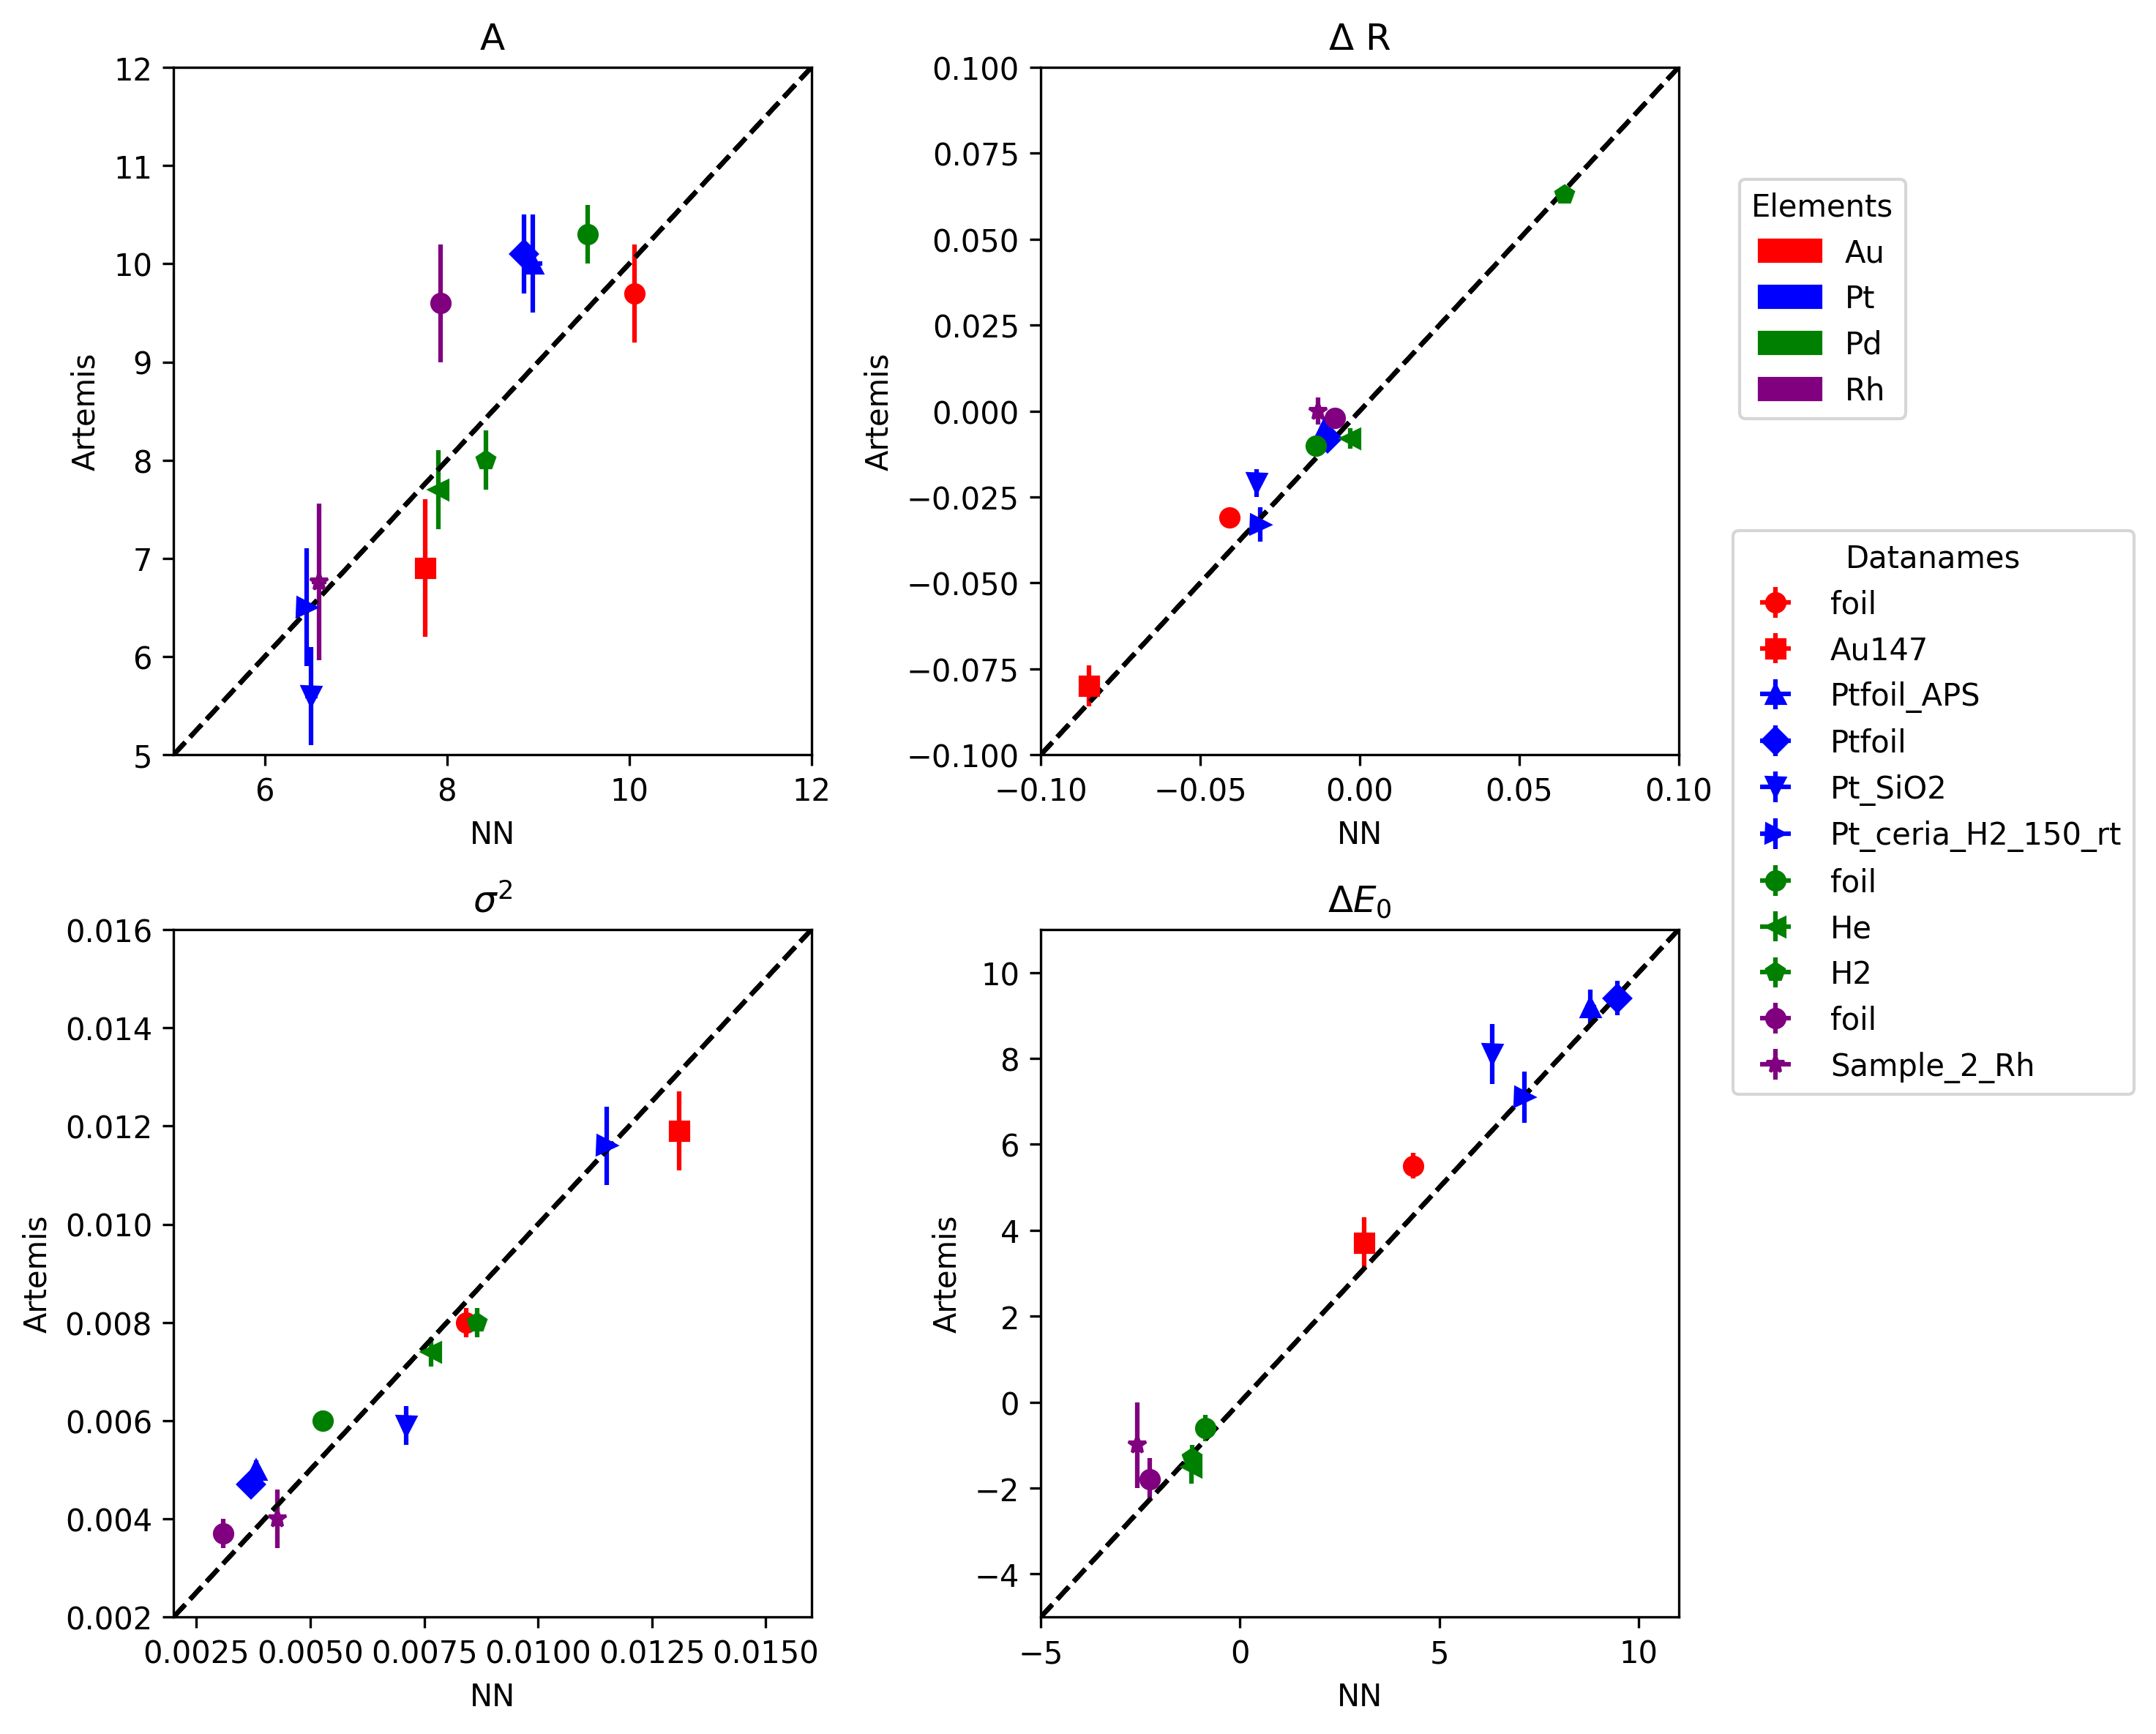

In [124]:
# Define markers for different datanames
markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h']
marker_dict = {}
marker_index = 0

fig, ax = plt.subplots(2, 2, figsize=(8, 8), dpi=300)

ax_titles = ["A", "$\Delta$ R", "$\sigma^{2}$", "$\Delta E_{0}$"]
param_indices = [0, 1, 2, 3]
pred_params = ["predicted_a", "predicted_deltar", "predicted_sigma2", "predicted_e0"]
unc_params = ["uncertainty_a", "uncertainty_deltar", "uncertainty_sigma2", "uncertainty_e0"]

element_color = {"Au": "red", "Pt": "blue", "Pd": "green", "Rh": "purple"}

for idx, (title, pred_param, pred_unc, true_index) in enumerate(zip(ax_titles, pred_params, unc_params, param_indices)):
    row, col = divmod(idx, 2)
    ax[row, col].set_title(title)
    ax[row, col].set_xlabel("NN")
    ax[row, col].set_ylabel("Artemis")
    
    if title == "A":
        ax[row, col].set_xlim(5, 12)
        ax[row, col].set_ylim(5, 12)
    elif title == "$\Delta$ R":
        ax[row, col].set_xlim(-0.1, 0.1)
        ax[row, col].set_ylim(-0.1, 0.1)
    elif title == "$\sigma^{2}$":
        ax[row, col].set_xlim(0.002, 0.016)
        ax[row, col].set_ylim(0.002, 0.016)
    elif title == "$\Delta E_{0}$":
        ax[row, col].set_xlim(-5, 11)
        ax[row, col].set_ylim(-5, 11)
    
    for element in element_color:
        nn = "BNN"
        for dataname in analysis[nn][element].keys():
            if dataname not in marker_dict:
                marker_dict[dataname] = markers[marker_index % len(markers)]
                marker_index += 1
            ax[row, col].errorbar(
                analysis[nn][element][dataname][pred_param],
                convert_str_to_list(analysis[nn][element][dataname]["artemis_result"])[true_index],
                xerr=analysis[nn][element][dataname][pred_unc],
                yerr=convert_str_to_list(analysis[nn][element][dataname]["artemis_unc"])[true_index],
                fmt=marker_dict[dataname],
                label=dataname,
                color=element_color[element],
                linestyle='None'
            )
        # Add dashed x=y line
        min_val, max_val = ax[row, col].get_xlim()[0], ax[row, col].get_xlim()[1]
        ax[row, col].plot([min_val, max_val], [min_val, max_val], 'k--')

# Create legend for datanames
handles_dataname, labels_dataname = ax[0,0].get_legend_handles_labels()
legend_dataname = fig.legend(handles_dataname, labels_dataname, loc='upper right', bbox_to_anchor=(1.23, 0.7), title="Datanames")

# Create legend for elements
element_patches = [mpatches.Patch(color=color, label=element) for element, color in element_color.items()]
legend_elements = fig.legend(element_patches, [element for element in element_color.keys()], loc='upper right', bbox_to_anchor=(1.1, .9), title="Elements")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

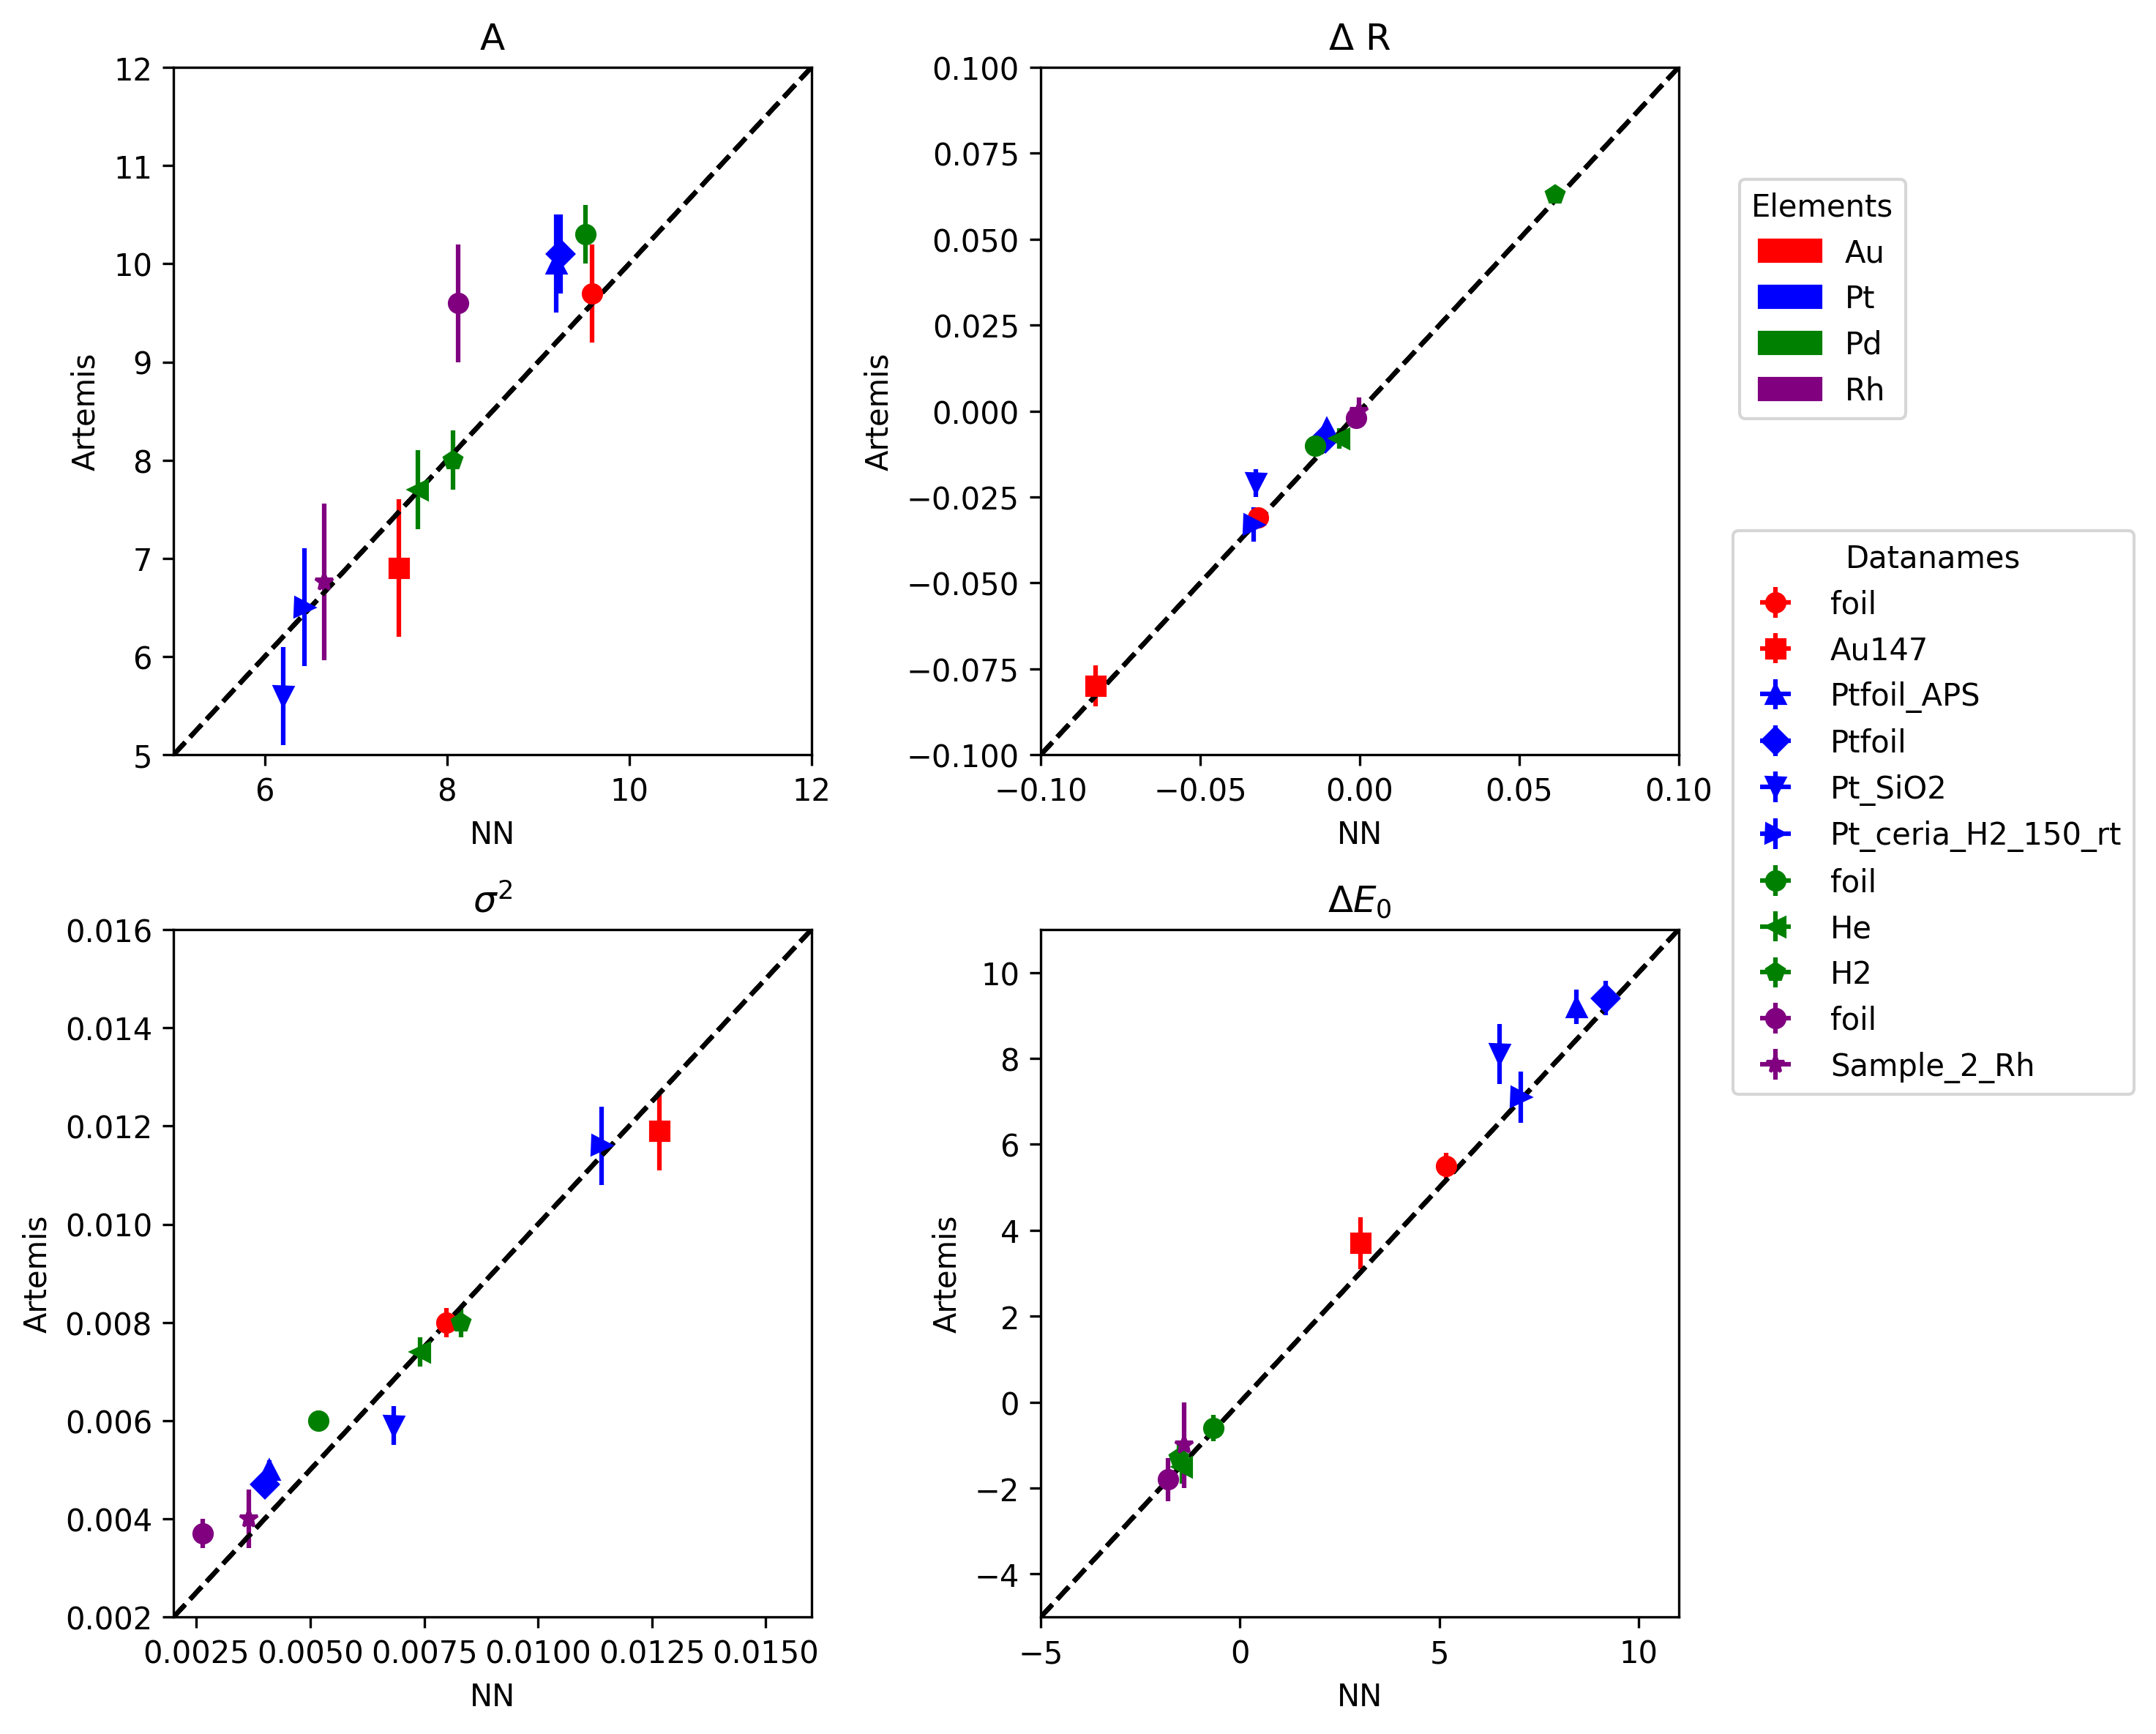

In [125]:
# Define markers for different datanames
markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h']
marker_dict = {}
marker_index = 0

fig, ax = plt.subplots(2, 2, figsize=(8, 8), dpi=300)

ax_titles = ["A", "$\Delta$ R", "$\sigma^{2}$", "$\Delta E_{0}$"]
param_indices = [0, 1, 2, 3]
pred_params = ["predicted_a", "predicted_deltar", "predicted_sigma2", "predicted_e0"]
unc_params = ["uncertainty_a", "uncertainty_deltar", "uncertainty_sigma2", "uncertainty_e0"]

element_color = {"Au": "red", "Pt": "blue", "Pd": "green", "Rh": "purple"}

for idx, (title, pred_param, pred_unc, true_index) in enumerate(zip(ax_titles, pred_params, unc_params, param_indices)):
    row, col = divmod(idx, 2)
    ax[row, col].set_title(title)
    ax[row, col].set_xlabel("NN")
    ax[row, col].set_ylabel("Artemis")
    
    if title == "A":
        ax[row, col].set_xlim(5, 12)
        ax[row, col].set_ylim(5, 12)
    elif title == "$\Delta$ R":
        ax[row, col].set_xlim(-0.1, 0.1)
        ax[row, col].set_ylim(-0.1, 0.1)
    elif title == "$\sigma^{2}$":
        ax[row, col].set_xlim(0.002, 0.016)
        ax[row, col].set_ylim(0.002, 0.016)
    elif title == "$\Delta E_{0}$":
        ax[row, col].set_xlim(-5, 11)
        ax[row, col].set_ylim(-5, 11)
    
    for element in element_color:
        nn = "MLP"
        for dataname in analysis[nn][element].keys():
            if dataname not in marker_dict:
                marker_dict[dataname] = markers[marker_index % len(markers)]
                marker_index += 1
            ax[row, col].errorbar(
                analysis[nn][element][dataname][pred_param],
                convert_str_to_list(analysis[nn][element][dataname]["artemis_result"])[true_index],
                xerr=analysis[nn][element][dataname][pred_unc],
                yerr=convert_str_to_list(analysis[nn][element][dataname]["artemis_unc"])[true_index],
                fmt=marker_dict[dataname],
                label=dataname,
                color=element_color[element],
                linestyle='None'
            )
        # Add dashed x=y line
        min_val, max_val = ax[row, col].get_xlim()[0], ax[row, col].get_xlim()[1]
        ax[row, col].plot([min_val, max_val], [min_val, max_val], 'k--')

# Create legend for datanames
handles_dataname, labels_dataname = ax[0,0].get_legend_handles_labels()
legend_dataname = fig.legend(handles_dataname, labels_dataname, loc='upper right', bbox_to_anchor=(1.23, 0.7), title="Datanames")

# Create legend for elements
element_patches = [mpatches.Patch(color=color, label=element) for element, color in element_color.items()]
legend_elements = fig.legend(element_patches, [element for element in element_color.keys()], loc='upper right', bbox_to_anchor=(1.1, .9), title="Elements")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()